# Download & Extract Dataset

In [ ]:
import urllib.request
urllib.request.urlretrieve('http://opihi.cs.uvic.ca/sound/genres.tar.gz', 'genres.tar.gz')

('genres.tar.gz', <http.client.HTTPMessage at 0x7fc27dbb8d90>)

In [ ]:
import tarfile
tar = tarfile.open('genres.tar.gz')
tar.extractall()
print('Done')

Done


# View Data Samples

In [ ]:
import librosa
import librosa.display
import numpy as np
import os
import skimage.io

In [ ]:
audio, sampling_rate = librosa.load('/content/genres/jazz/jazz.00000.wav', duration=30)

Wave plot

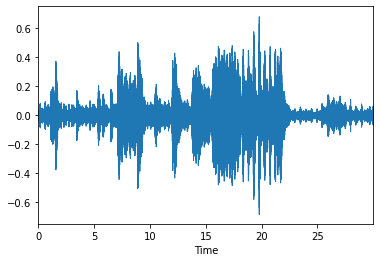

In [ ]:
librosa.display.waveplot(audio)

Spectrogram before normalizing

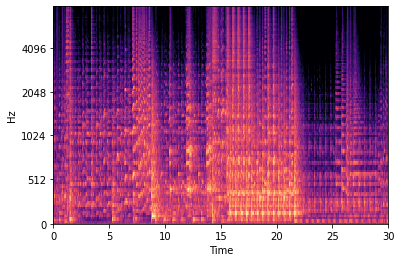

In [ ]:
mel_spec = librosa.feature.melspectrogram(audio)
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), x_axis='time', y_axis='mel', fmax=8000)

Spectrogram after normalizing

In [ ]:
mel_spec = librosa.feature.melspectrogram(audio)
mel_spec = (mel_spec - np.min(mel_spec)) / np.max(mel_spec) ** 3

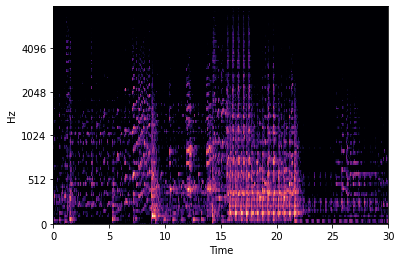

In [ ]:
librosa.display.specshow(librosa.power_to_db(mel_spec, ref=np.max), x_axis='time', y_axis='mel', fmax=8000)

For MFCCs, extract 20 coefficients with each time frames then compute mean of all time frames

In [ ]:
mfcc = librosa.feature.mfcc(audio)
np.mean(mfcc, axis=1)

array([-2.5196730e+02,  1.3789000e+02, -1.1156485e+01,  8.3573647e+00,
        7.1749020e-01,  1.5899868e+00, -3.7351365e+00, -4.1368532e+00,
       -5.5104036e+00, -2.6439190e+00, -3.5395784e+00, -3.1485081e+00,
       -1.8484627e+00, -1.0026785e+00, -2.5899353e+00, -1.9624016e+00,
       -1.5023316e+00,  2.2148038e-01, -1.9916278e+00, -3.3483126e+00],
      dtype=float32)

# Extract log mel spectrogram


In [ ]:
os.makedirs('mel_spectrogram')

In [ ]:
for file_name in os.listdir('/content/genres'):
  if file_name not in os.listdir('/content/mel_spectrogram') and not file_name.endswith('.mf'):
    os.mkdir('/content/mel_spectrogram/' + file_name)
    for wav_file in os.listdir('/content/genres/' + file_name):
      try:
        audio, sampling_rate = librosa.load('/content/genres/' + file_name + '/' + wav_file, duration=25)
        mel_spec = librosa.feature.melspectrogram(audio)
        mel_spec = (mel_spec - np.min(mel_spec)) / np.max(mel_spec) ** 3
        skimage.io.imsave('mel_spectrogram/' + file_name + '/' + wav_file[:-4] + '.png', np.flip(librosa.power_to_db(mel_spec, ref=np.max), axis=0))
      except:
        print('/content/genres/' + file_name + '/' + wav_file)

Save spectrogram as images & stored in tar file for later uses

In [ ]:
import tarfile
import os.path
 
def make_tarfile(output_filename, source_dir):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=os.path.basename(source_dir))
 
make_tarfile('mel_spec.tar.gz', '/content/mel_spectrogram')

In [ ]:
import shutil

In [ ]:
shutil.copy('/content/mel_spec.tar.gz', '/content/drive/MyDrive')

'/content/drive/MyDrive/mel_spec.tar.gz'

# Extract MFCCs

Save MFCCs as csv file for later uses. We will split each original wav file into 10 subfiles of 3 seconds. Then we extract the features

In [ ]:
import csv

In [ ]:
audio[0: 66150]

array([-0.19119263, -0.23266602, -0.13912964, ...,  0.09597778,
        0.13162231,  0.1729126 ], dtype=float32)

In [ ]:
with open('mfcc.csv', mode='w') as mfcc_csv:
    writer = csv.writer(mfcc_csv, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    writer.writerow(['MFCC1_Mean', 'MFCC2_Mean', 'MFCC3_Mean', 'MFCC4_Mean', 'MFCC5_Mean', 'MFCC6_Mean', 'MFCC7_Mean', 'MFCC8_Mean', 'MFCC9_Mean', 'MFCC10_Mean', 'MFCC11_Mean', 'MFCC12_Mean', 'MFCC13_Mean', 'MFCC14_Mean', 'MFCC15_Mean', 'MFCC16_Mean', 'MFCC17_Mean', 'MFCC18_Mean', 'MFCC19_Mean', 'MFCC20_mean', 
                     'MFCC1_Var', 'MFCC2_Var', 'MFCC3_Var', 'MFCC4_Var', 'MFCC5_Var', 'MFCC6_Var', 'MFCC7_Var', 'MFCC8_Var', 'MFCC9_Var', 'MFCC10_Var', 'MFCC11_Var', 'MFCC12_Var', 'MFCC13_Var', 'MFCC14_Var', 'MFCC15_Var', 'MFCC16_Var', 'MFCC17_Var', 'MFCC18_Var', 'MFCC19_Var', 'MFCC20_Var', 'Label'])
    for file_name in os.listdir('/content/genres'):
      if not file_name.endswith('.mf'):
        for wav_file in os.listdir('/content/genres/' + file_name):
          try:
            audio, sampling_rate = librosa.load('/content/genres/' + file_name + '/' + wav_file, duration=30)
            for step in range(0, len(audio) - len(audio)//10, len(audio)//10):
              mfcc = librosa.feature.mfcc(audio[step:step+len(audio)//10])
              writer.writerow(np.mean(mfcc, axis=1).tolist() + np.var(mfcc, axis=1).tolist() + [file_name])
          except:
            print('/content/genres/' + file_name + '/' + wav_file)